#### This project is based on Time series data, it basically means how collected data varies over time and how it is dependent on data. Time series forecasting can be used in a various industries where data is used to analyze sales for next year, traffic count, and product demand .

#### In this project we will be particulary focusing on forecasting order demand for a product. This is an supervised model and shouldn't be confused with regression

#### Time series forecasting is the use of model to predict future values based on previously observed values

Hypothesis Generation before looking at data, Generally done to avoid any bias thay may result after the observation

Helps us to point out the factors which might affect our dependent variable which is order_demand. Some factors which i think can affect the order  demand are<br>

1.There will be increase in product demand as time passes by<br>
2.Order demand peaks in summer breaks(may-oct),during festival seasons(in some countries) and during winter breaks(dec-january)<br>
3.Order demand will be more on weekends rather than weekdays<br>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
url="https://raw.githubusercontent.com/Manudeep-git/World_Wide_Products/main/data/Historical%20Product%20Demand.csv"

## The Data

In [4]:
data=pd.read_csv(url)
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [5]:
data.shape

(1048575, 5)

In [6]:
#checking no of unique product codes
data.Product_Code.nunique()

2160

In [7]:
# we already know this, there are 4 data warehouses
data.Warehouse.nunique()

4

In [8]:
#checking no of unique product_categories
data.Product_Category.nunique()

33

In [9]:
#check the data types
data.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

### Data Preprocessing , inclues some feature engineering

In [10]:
#null values
data.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [11]:
#since null values are very less(1% of data), we can drop these
data=data.dropna(axis=0)
data.reset_index(drop=True)
data.shape

(1037336, 5)

In [12]:
# some of the order_demand values have () in them, we should remove those brackets
data.sort_values(by='Date').head(3)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011/1/8,2
131429,Product_0412,Whse_S,Category_007,2011/10/20,(2)
131426,Product_0125,Whse_S,Category_011,2011/10/20,(2)


In [13]:
# Removing () from target feature
data['Order_Demand']=data['Order_Demand'].str.replace("(","")
data['Order_Demand']=data['Order_Demand'].str.replace(")","")
#changing datatype for order_demand - target variable
data['Order_Demand']=data['Order_Demand'].astype('int64')
data.sort_values(by='Date').head(3)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
44799,Product_0965,Whse_A,Category_006,2011/1/8,2
131429,Product_0412,Whse_S,Category_007,2011/10/20,2
131426,Product_0125,Whse_S,Category_011,2011/10/20,2


In [22]:
#converting Date to 'datetime' datatype
data['Date']=pd.to_datetime(data.Date,format="%Y-%m-%d")
data.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
Day_of_Week                  int64
Weekend                      int64
dtype: object

In [25]:
#extracting date month and year from "Date"
data['year']=pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day']=pd.DatetimeIndex(data['Date']).day

In [26]:
data.head(3)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Day_of_Week,Weekend,year,month,day
0,Product_0993,Whse_J,Category_028,2012-07-27,100,4,0,2012,7,27
1,Product_0979,Whse_J,Category_028,2012-01-19,500,3,0,2012,1,19
2,Product_0979,Whse_J,Category_028,2012-02-03,500,4,0,2012,2,3


In [27]:
#getting day of week
data['Day_of_Week']=data['Date'].dt.dayofweek

In [17]:
# Labelling weekend as 1 and weekday as 0
data['Weekend']=data['Day_of_Week'].apply(lambda x: 1 if (x==5 or x==6) else 0)

In [28]:
data.head(3)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Day_of_Week,Weekend,year,month,day
0,Product_0993,Whse_J,Category_028,2012-07-27,100,4,0,2012,7,27
1,Product_0979,Whse_J,Category_028,2012-01-19,500,3,0,2012,1,19
2,Product_0979,Whse_J,Category_028,2012-02-03,500,4,0,2012,2,3


### Exploratory Data Analysis

We wii verify our hypothesis here, It may be or may not be true

Since we have lot of products, we will take one Product and test ou hypthesis, let's do some <B>EDA</B> for selecting the product

#### Plotting Target Variable

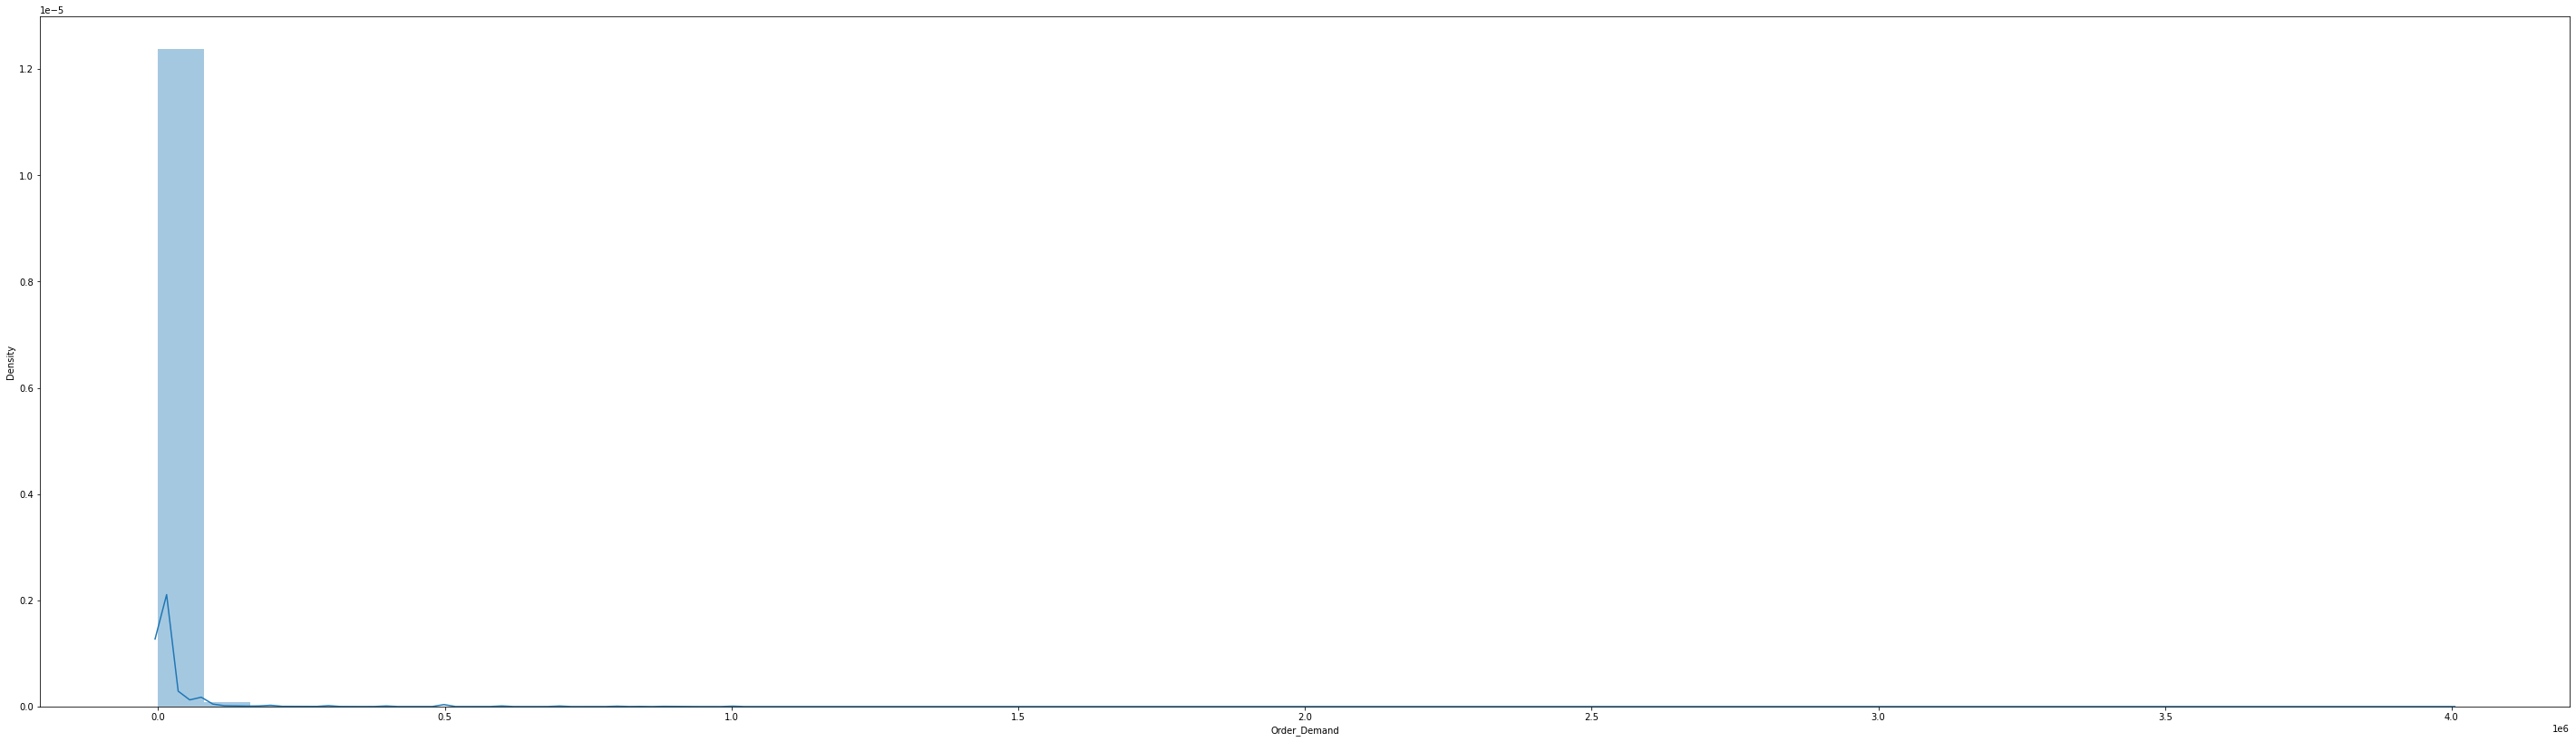

In [29]:
sns.distplot(data['Order_Demand'])

### Bivaraite Analysis: Warehouse, Product Category with target variable

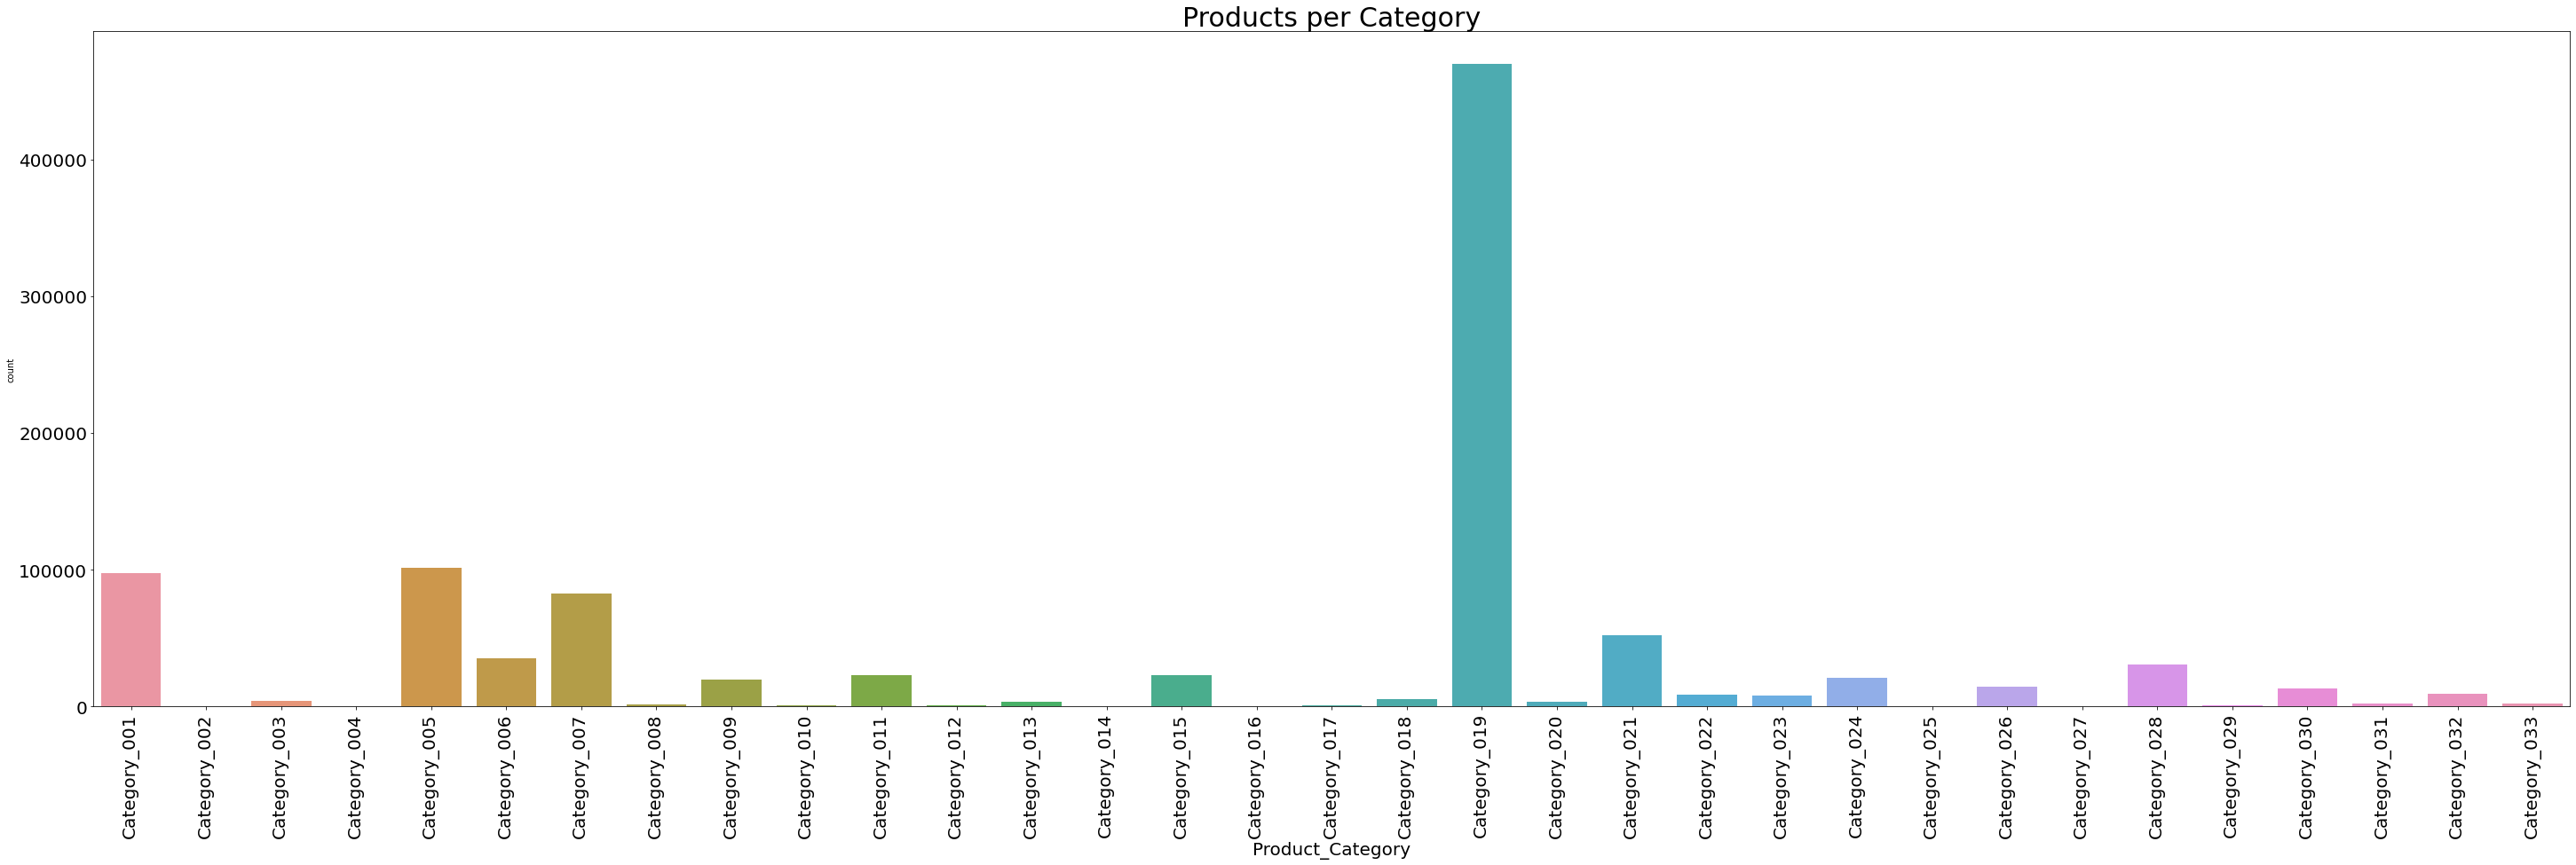

In [30]:
#grouping by category to see no of products in each category
rcParams['figure.figsize'] = 50,14
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel("Product_Category",fontsize=20)
plt.title("Products per Category",fontsize=30)
sns.countplot(data['Product_Category'].sort_values(ascending=True))

Observations : Lot of orders on category_19

### Monthly Order Demand by Warehouse

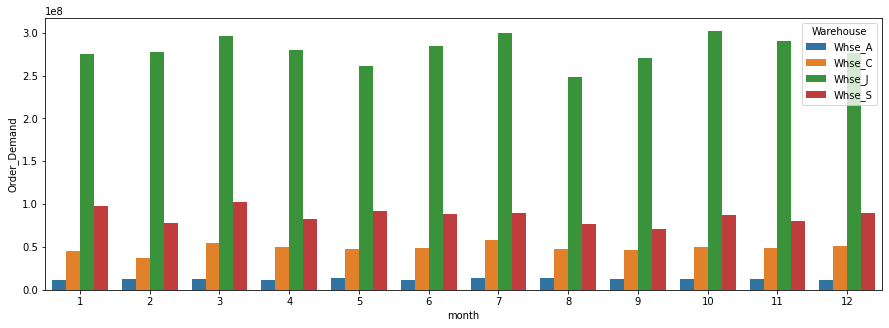

In [31]:
df = data.groupby(['Warehouse', 'month'])['Order_Demand'].sum().reset_index()
plt.figure(figsize=(15, 5))

sns.barplot(x="month", y="Order_Demand",
            hue="Warehouse", data=df);

Warehouse J has highest number or oders

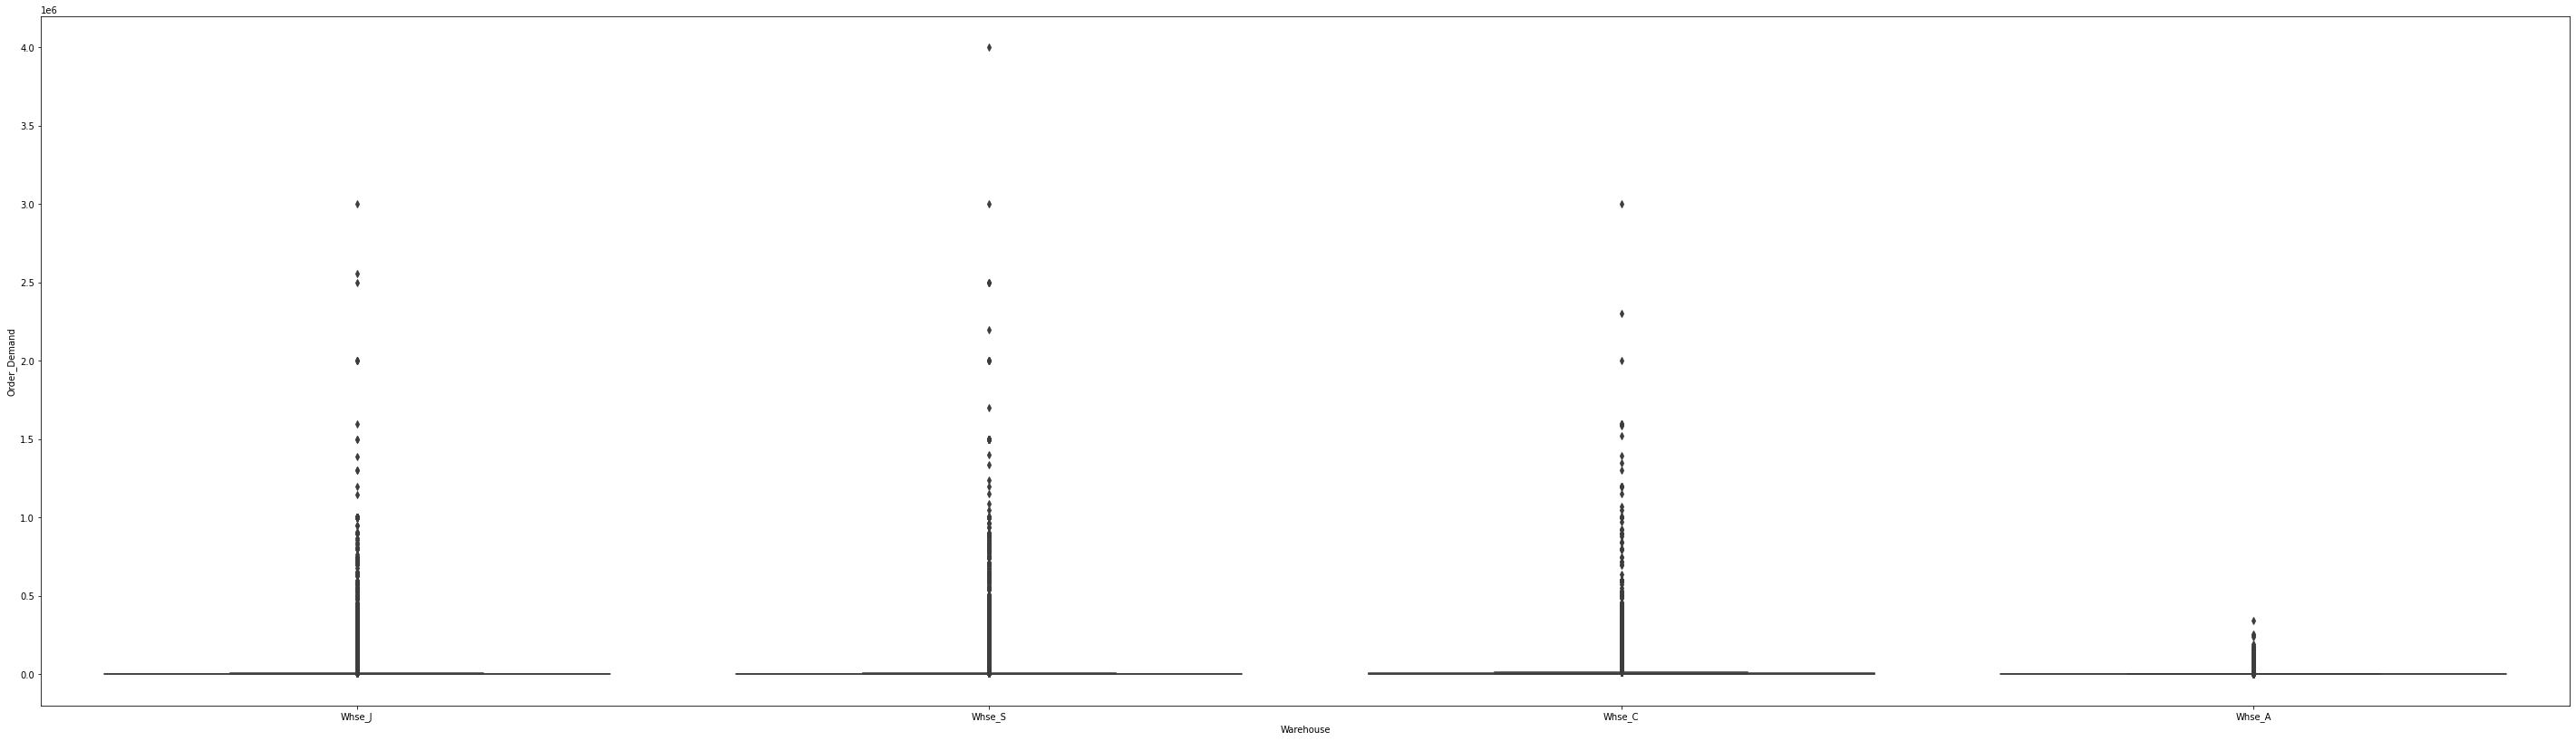

In [32]:
sns.boxplot(data['Warehouse'],data['Order_Demand'])

In [33]:
#getting the more frequent products
product_frequency=data.groupby(['Product_Code']).size().reset_index(name='Count').sort_values(['Count'],ascending=False)
product_frequency.head(10)

,Product_Code,Count
1348,Product_1359,16936
1284,Product_1295,10575
1367,Product_1378,9770
619,Product_0620,9428
1275,Product_1286,8888
1371,Product_1382,8619
1442,Product_1453,8503
1283,Product_1294,8384
1366,Product_1377,7872
1276,Product_1287,7829


Lets take the product "Product_1359" and test our hypothesis

First hypothesis was that order_demand will increase as the years pass by..

In [34]:
#getting the dataframe with the required product
df_1359=data[data.Product_Code=='Product_1359']

In [35]:
#start date is 2012-01-05
df_1359.sort_values(by='Date').head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Day_of_Week,Weekend,year,month,day
59646,Product_1359,Whse_J,Category_019,2012-01-05,1000,3,0,2012,1,5
63099,Product_1359,Whse_J,Category_019,2012-01-05,5000,3,0,2012,1,5
2577,Product_1359,Whse_J,Category_019,2012-01-05,2000,3,0,2012,1,5
32610,Product_1359,Whse_J,Category_019,2012-01-05,10000,3,0,2012,1,5
46739,Product_1359,Whse_J,Category_019,2012-01-05,5000,3,0,2012,1,5


In [36]:
#end date is 2017-01-06
df_1359.sort_values(by='Date').tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Day_of_Week,Weekend,year,month,day
870423,Product_1359,Whse_J,Category_019,2016-12-28,3000,2,0,2016,12,28
863720,Product_1359,Whse_J,Category_019,2016-12-28,13000,2,0,2016,12,28
864053,Product_1359,Whse_J,Category_019,2016-12-28,50000,2,0,2016,12,28
877287,Product_1359,Whse_J,Category_019,2016-12-28,3000,2,0,2016,12,28
921328,Product_1359,Whse_J,Category_019,2017-01-06,100000,4,0,2017,1,6


In [37]:
#converting order_demand into integer
df_1359['Order_Demand']=df_1359['Order_Demand'].astype('int64')

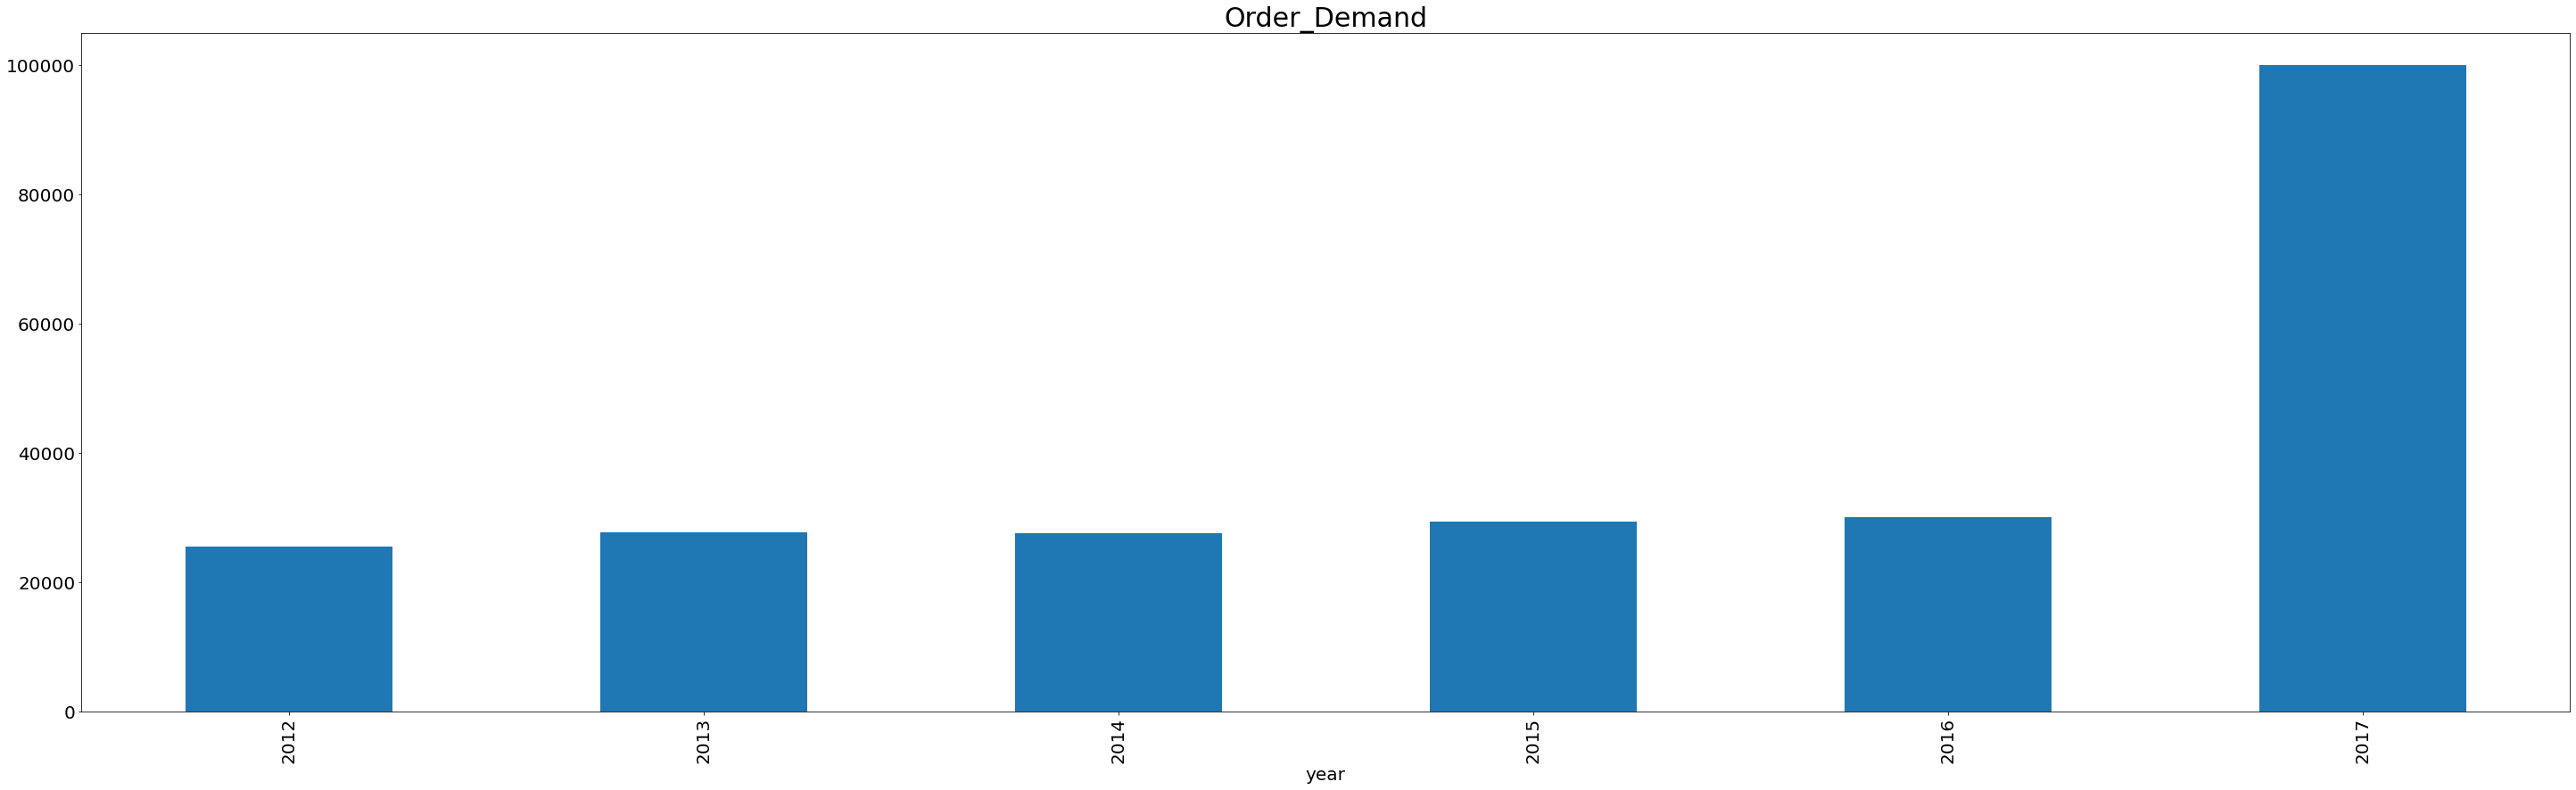

In [38]:
rcParams['figure.figsize'] = 50,14
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.title("Order_Demand",fontsize=30)
df_1359.groupby(['year'])['Order_Demand'].mean().plot.bar()

Our assumption is partially valid as order demand is quite high in 2017 for this product and not a significant growth from 2012 to 2016

Our second hypothesis is traffic increases in may-october and in months december-february, let's check that

Text(0.5, 0, 'Month')

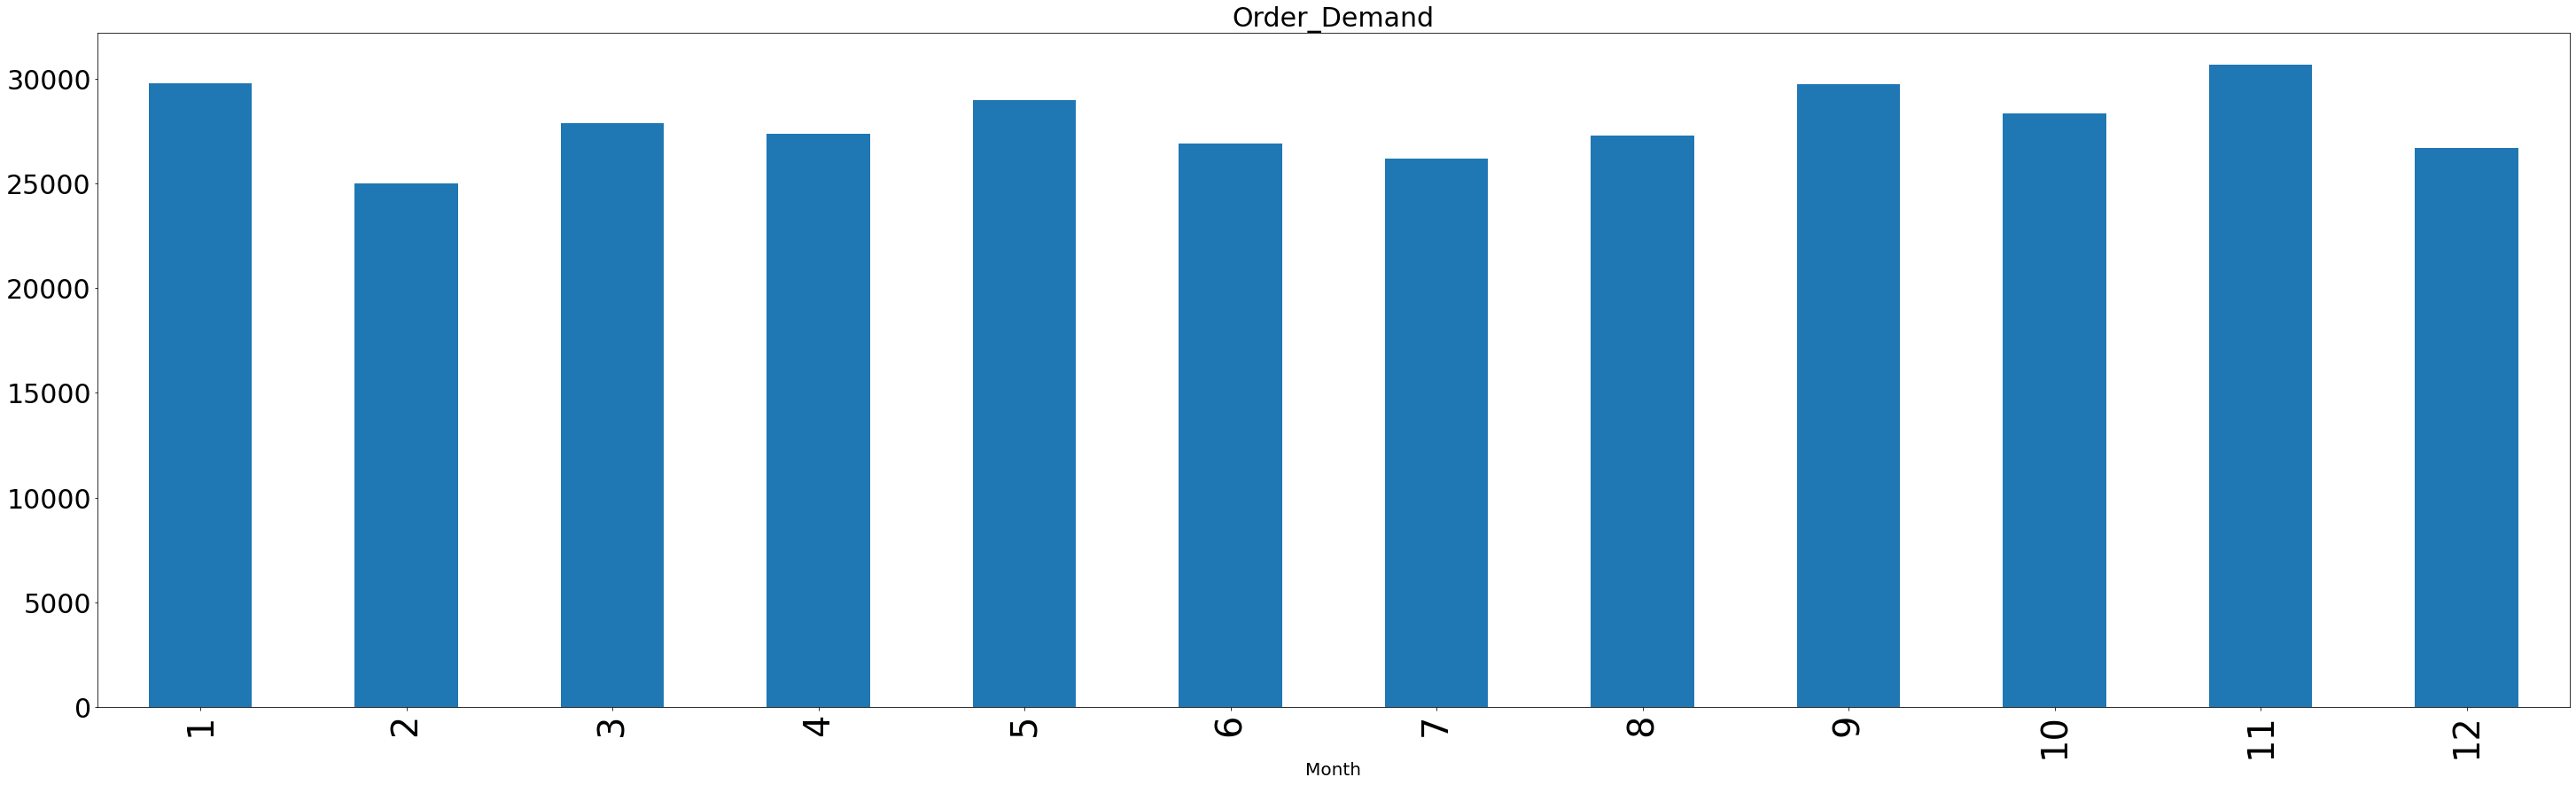

In [39]:
rcParams['figure.figsize'] = 50,14
plt.xticks(fontsize=40)
plt.yticks(fontsize=30)
plt.title("Order_Demand",fontsize=30)
df_1359.groupby(['month'])['Order_Demand'].mean().plot.bar()
plt.xlabel("Month",fontsize=20)

Here there is a decrease in order_demand from 11-12th month and as per assumption, order_demand is quite high in 1st month, but it is higher in 11th month rather than in 5-8 months as per assumption

Text(0.5, 0, 'Day')

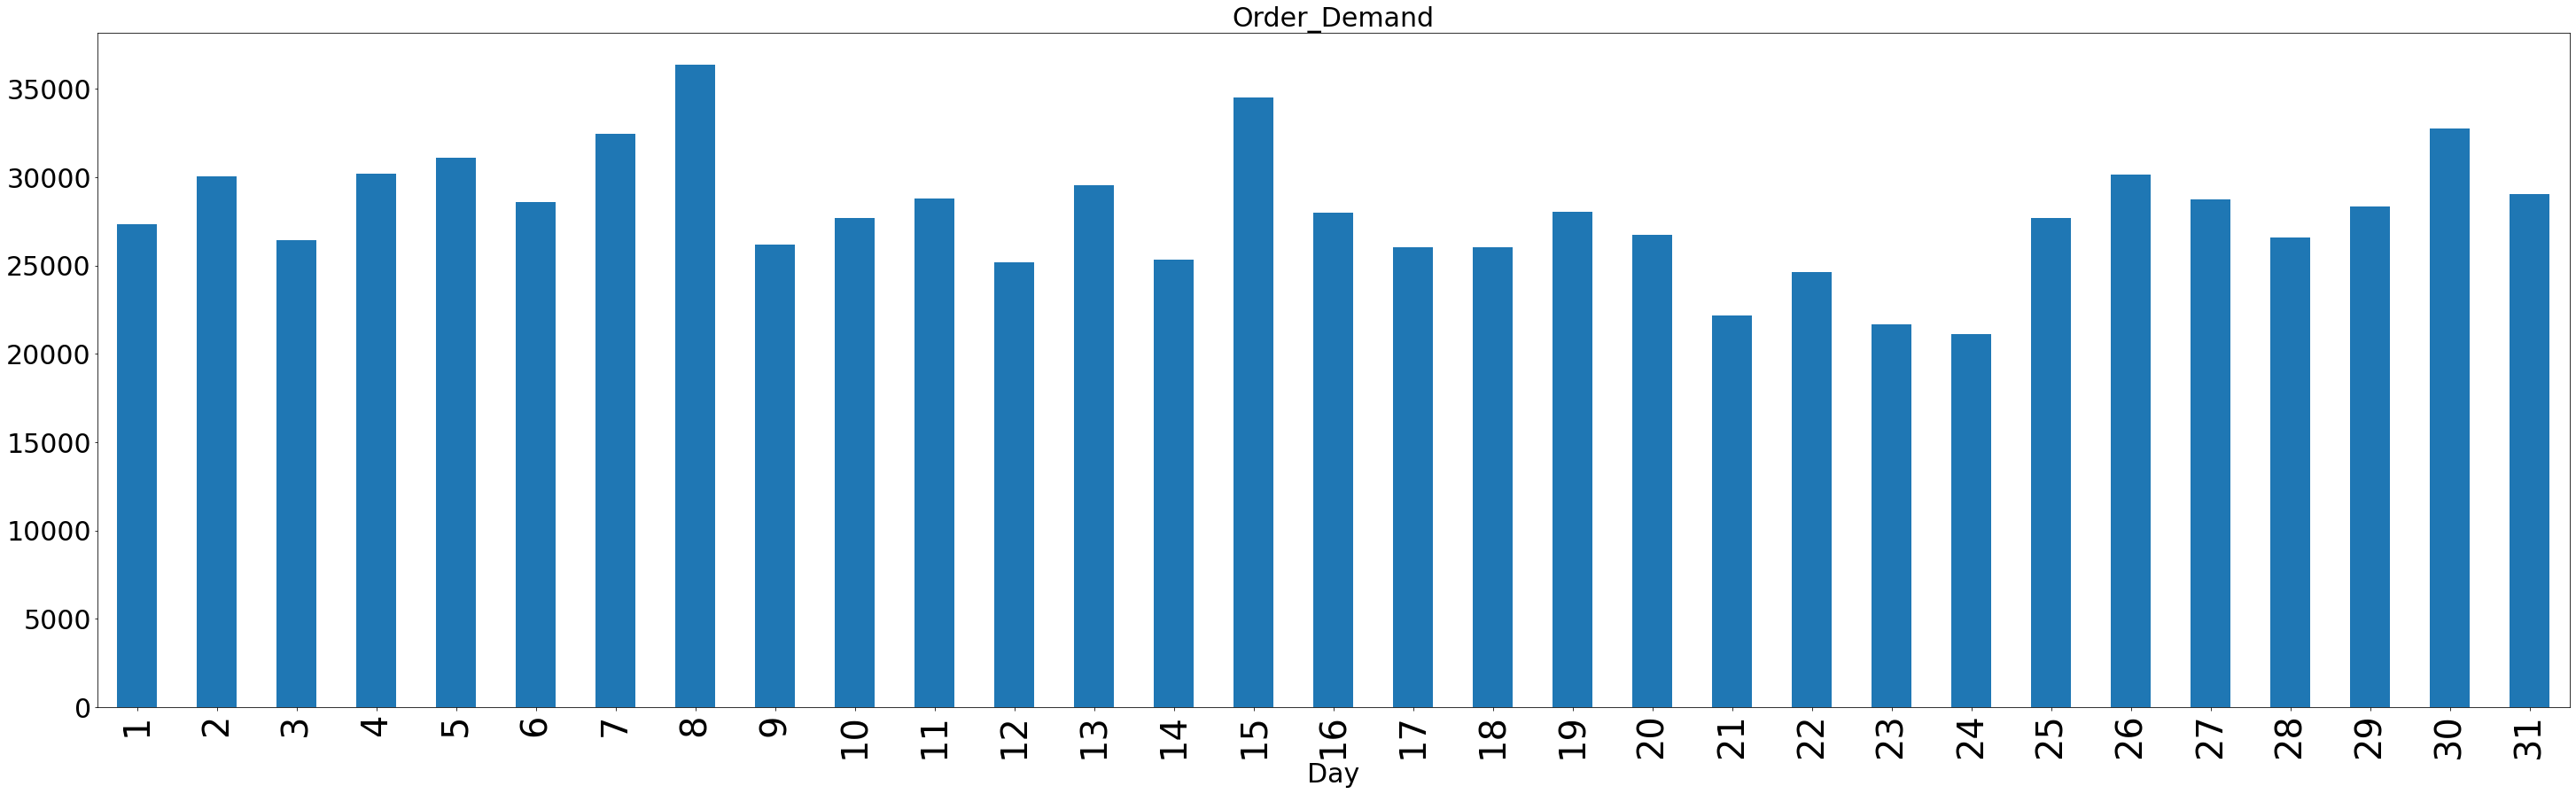

In [40]:
#plotting daily order_demand
rcParams['figure.figsize'] = 50,14
plt.xticks(fontsize=40)
plt.yticks(fontsize=30)
plt.title("Order_Demand",fontsize=30)
df_1359.groupby(['day'])['Order_Demand'].mean().plot.bar()
plt.xlabel("Day",fontsize=30)

This doesn't give much information

Text(0.5, 0, 'Weekend')

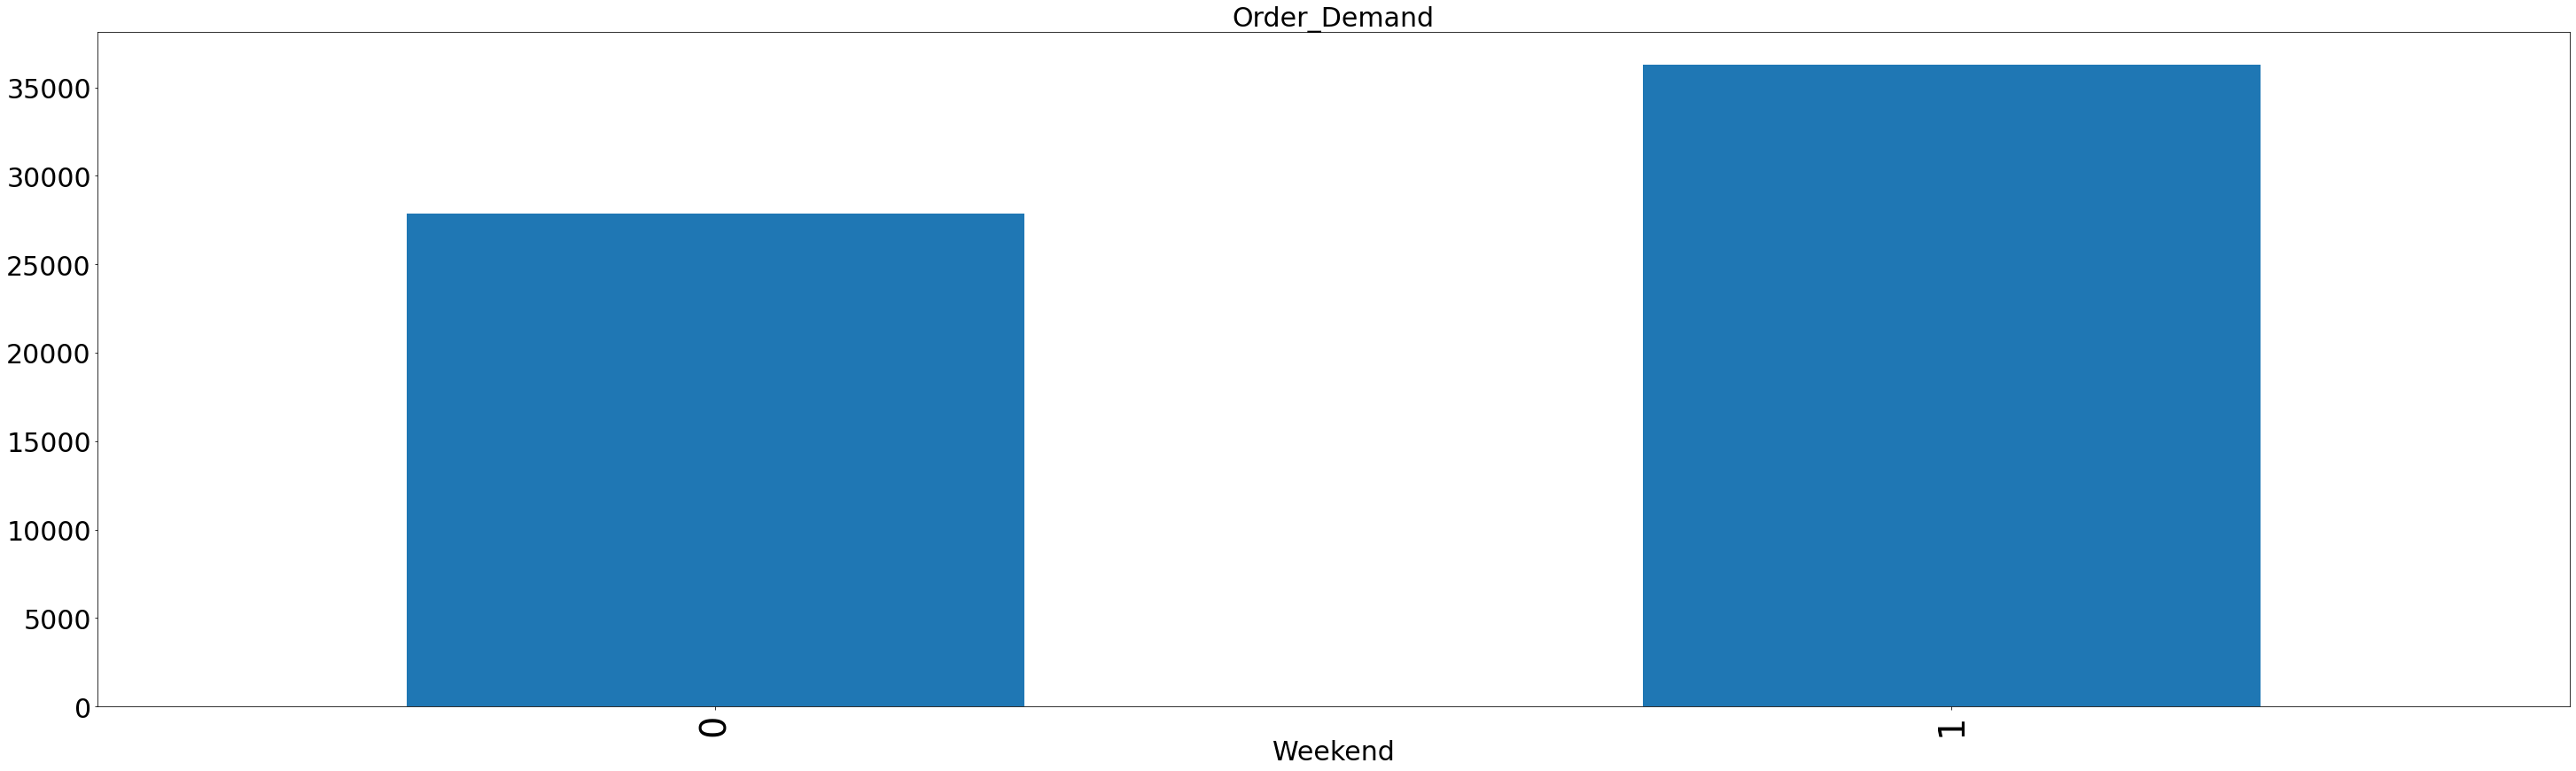

In [41]:
#testing hypothesisi that order_demand will be more on weekends
rcParams['figure.figsize'] = 50,14
plt.xticks(fontsize=40)
plt.yticks(fontsize=30)
plt.title("Order_Demand",fontsize=30)
df_1359.groupby(['Weekend'])['Order_Demand'].mean().plot.bar()
plt.xlabel("Weekend",fontsize=30)

Finally one assumption that is accurate :), We can see that order demand is more on weekends as compared to weekdays

### Plotting Time Series

In [42]:
#setting index to Date
df_1359.index=df_1359.Date
df_1359.index

DatetimeIndex(['2012-04-18', '2012-05-21', '2012-06-26', '2012-07-17',
               '2012-08-24', '2012-10-04', '2012-10-29', '2012-01-12',
               '2012-01-20', '2012-02-03',
               ...
               '2016-03-18', '2016-04-01', '2016-05-09', '2016-06-02',
               '2016-08-01', '2016-10-03', '2016-09-16', '2016-11-01',
               '2016-12-01', '2016-12-09'],
              dtype='datetime64[ns]', name='Date', length=16936, freq=None)

In [43]:
#yearly time series
yearly=df_1359.resample('y').mean()
#monthly time series
monthly=df_1359.resample('m').mean()
#daily time series
daily=df_1359.resample('D').mean()

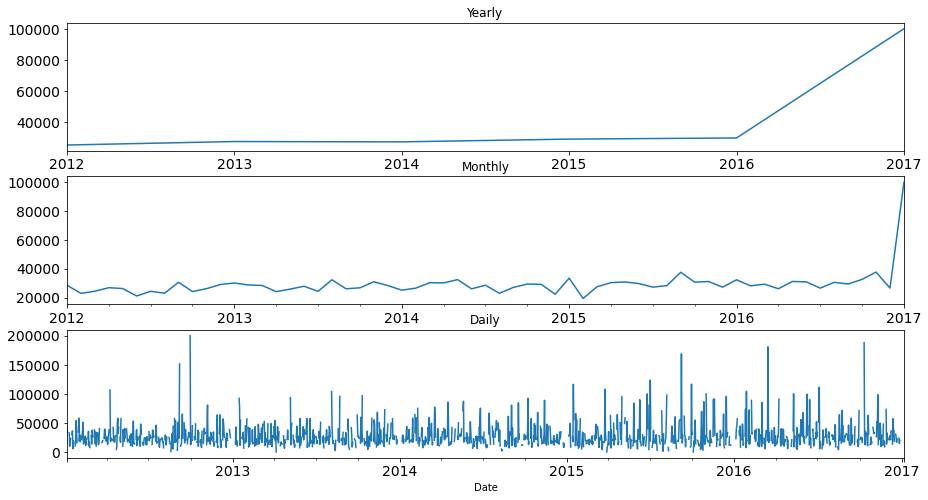

In [ ]:
fig,axis=plt.subplots(3,1)
yearly.Order_Demand.plot(figsize=(15,8), title='Yearly',fontsize=14,ax=axis[0])
monthly.Order_Demand.plot(figsize=(15,8), title='Monthly',fontsize=14,ax=axis[1])
daily.Order_Demand.plot(figsize=(15,8), title='Daily',fontsize=14,ax=axis[2])
plt.show()

We can see time series is more stable when we are aggregating it on Monthly and yearly basis as compared to daily basis

Lets work on the monthly time series

In [44]:
#Calculating sum of order demand for this product on per month basis
product_1359_Month = df_1359["Order_Demand"].resample('MS').sum()
product_1359_Month['2016':]

Date
2016-01-01    7339000
2016-02-01    7196000
2016-03-01    7556000
2016-04-01    6341000
2016-05-01    6854000
2016-06-01    7870000
2016-07-01    7108000
2016-08-01    6934000
2016-09-01    6960000
2016-10-01    7727000
2016-11-01    8814000
2016-12-01    5653000
2017-01-01     100000
Freq: MS, Name: Order_Demand, dtype: int64

In [45]:
#Ignoring date 2017-01-01 as it is incomplete for the year
product_1359_Month = product_1359_Month.drop(pd.to_datetime('2017-01-01'))
product_1359_Month['2017':]

Series([], Freq: MS, Name: Order_Demand, dtype: int64)

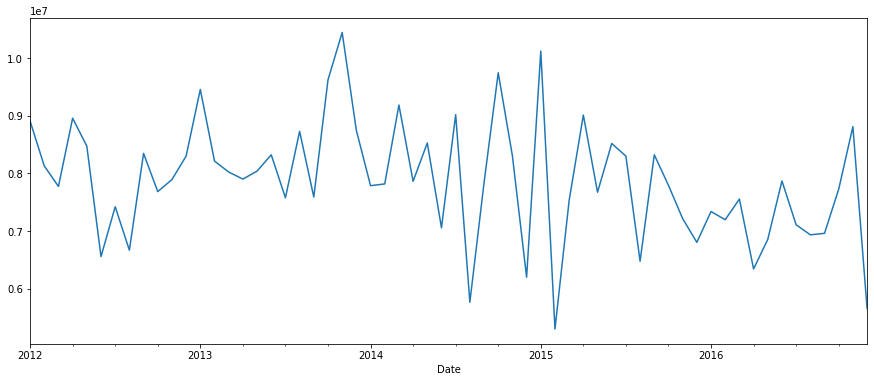

In [46]:
#Visualizing Demand Time Series Data
product_1359_Month.plot(figsize=(15, 6))
plt.show()

In [47]:
#converting into monthly time series
df_1359=df_1359.resample('M').mean()

In [48]:
df_1359.tail()

,Order_Demand,Day_of_Week,Weekend,year,month,day
Date,,,,,,
2016-09-30,29367.088608,2.341772,0.000000,2016.0,9.0,15.434599
2016-10-31,32603.375527,1.936709,0.012658,2016.0,10.0,15.717300
2016-11-30,37666.666667,1.863248,0.000000,2016.0,11.0,14.307692
2016-12-31,26539.906103,2.028169,0.000000,2016.0,12.0,13.765258
2017-01-31,100000.000000,4.000000,0.000000,2017.0,1.0,6.000000


We've already seen that start date is 2012-01-05 and end date is 2107-01-06

In [49]:
#splitting data into Train and validation
DF_1359_Train=df_1359['2012-01-31':'2016-09-30']
DF_1359_Valid= df_1359['2016-09-30':'2017-01-31']

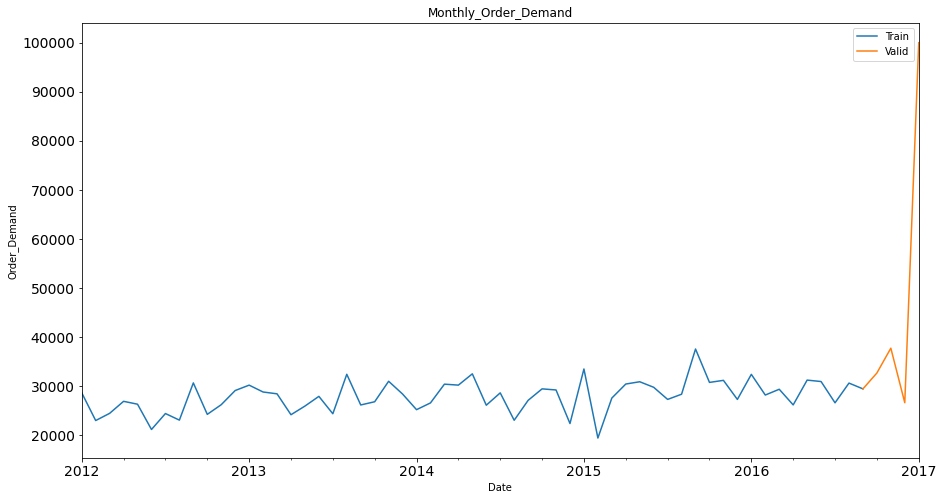

In [50]:
DF_1359_Train.Order_Demand.plot(figsize=(15,8), title="Monthly_Order_Demand",fontsize=14,label="Train")
DF_1359_Valid.Order_Demand.plot(figsize=(15,8), title="Monthly_Order_Demand",fontsize=14,label="Valid")
plt.xlabel("Date")
plt.ylabel("Order_Demand")
plt.legend()
plt.show()

### Predicting Models

In [51]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'Day_of_Week', 'Weekend', 'year', 'month', 'day'],
      dtype='object')

According to what was observed during the exploratory analysis, we will use the following features for training

In [52]:
df = data[data['Product_Code'] == 'Product_1359']
cols = ['Date', 'Warehouse', 'Order_Demand','year', 'month', 'day', 'Day_of_Week','Weekend']
df = df[cols]

As the majority of the Python packages does not support categorical featuers, we have to convert them to numerical. We can do this using LabelEncoder

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Warehouse'])
df['Warehouse'] = le.transform(df['Warehouse'] )

Let's seperate our target variable

In [55]:
x = df.drop(['Order_Demand', 'Date'], axis=1).copy()
y = df['Order_Demand'].copy()

Let's define a performance metric. We are going to use the root mean squared error (RMSE), which is often used in regression problems. The advantage of the RMSE is that is keeps the error in the same order as the target variable, which helps in the task of analyzing the model performance.

In [56]:
def root_mean_squared_error(y_true, y_pred):
    """Calculates RMSE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return ((y_true - y_pred) ** 2).mean() ** .5

In [57]:
df['Order_Demand'].min(), df['Order_Demand'].max()

(0, 2000000)

### XGB Regressor

First, let's train a simple XGB Regressor. It will use all selected features to predict the order demand for a given warehouse, day of month, day of week, month, week of year and year.

Let's split the data in train / test sets.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Here, we are modeling using XGB default parameters. To improve our results and capture the most of the data, we should fine tune the model parameters using something as GridSearch, from Sklearn.

In [59]:
import xgboost as xgb

model = xgb.XGBRegressor(seed=0)
model.fit(X_train, y_train)
print(model)

[16:35:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
             subsample=1, verbosity=1)


In [60]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE : {rmse:.2f}')

RMSE : 68556.01


In [61]:
68556.01/2000000

0.034278005

This simple model results in a RMSE of 68556.01. Remember that the target value varies from 0 to 2000000 (68556.01/2000000= <b>0.034278005%</b>). Hence, with a simple model, we were able to achieve a good result.

**Facebook Prophet**

Now, let's try a more complex model: "Facebook Prophet". It is a powerful model that takes care of a lot of things automatically

As a time series model, it expects just the date time value and its correspondent target variable. We don't have to worry with missing data or shifts in the data (which happens in this data set).

In [62]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

Let's check the date range:

In [63]:
df['Date'].min(), df['Date'].max()

(Timestamp('2012-01-05 00:00:00'), Timestamp('2017-01-06 00:00:00'))

We are going to split the data in train test again. Here, as we are using a time series model, we have to take care to not shuffle the data. Hence, we are going to use data until 2016-01-01 for training. After that period, the data will be used for test.

In [64]:
import datetime 

d = pd.to_datetime('2016-01-01')
train = df[df['Date'] < d]
test = df[df['Date'] >= d]

Let's create a basic model using Facebook Prophet defaults. We are going to add a regressor, thought, for the Warehouse, as we have notice that each warehouse presents a different behavior regarding its order demands.

In [65]:
model = Prophet()
model.add_regressor('Warehouse')

model.fit(train.rename(columns={'Date':'ds', 'Order_Demand':'y'}));


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [66]:
forecast = model.predict(df=test.rename(columns={'Date':'ds'}))

Let's plot the forecast components:

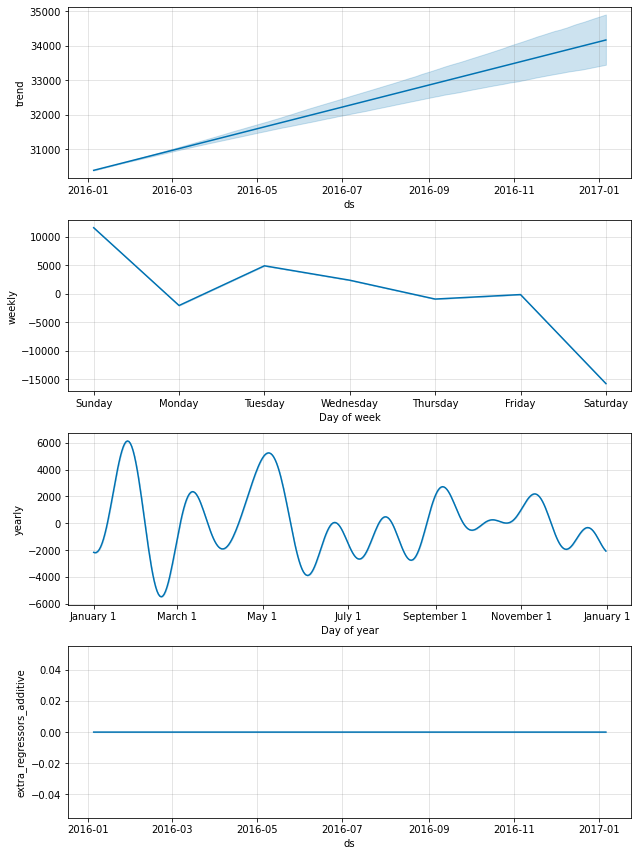

In [67]:
model.plot_components(forecast);


From these plots, we see that the trend is an increase in the order demand, as observed in the exploratory analysis of the data. From the weekly seasonality, we see a similar behavior as observed in the exploratory analysis as well, with high order demands from Sunday to Thursday. The yearly seasonality, on the order hand, shows a good variation of order demand according to the month of the year. Finally, it seems that the additional regressor, added for the warehouse, it's not affecting the model.

In [68]:
rmse = root_mean_squared_error(y_true=test['Order_Demand'], y_pred=forecast['yhat'])
print(f'RMSE : {rmse:.2f}')

RMSE : 82987.39


Here, we see that the achieved RMSE is a little bit higher than using a XGB Regressor, which is not expected :(

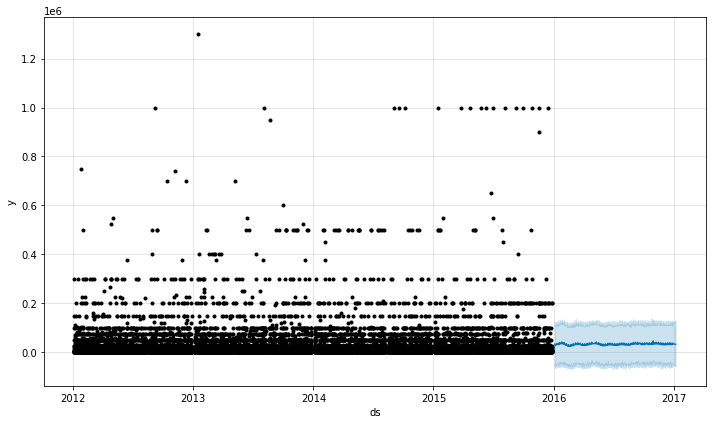

In [69]:
model.plot(forecast);

**Dependencies**


In [70]:
import types

def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

excludes = ['builtins', 'types', 'sys']

imported_modules = [module for module in imports() if module not in excludes]
clean_modules = []

for module in imported_modules:

    sep = '.'  # to handle 'matplotlib.pyplot' cases
    rest = module.split(sep, 1)[0]
    clean_modules.append(rest)

changed_imported_modules = list(set(clean_modules))  # drop duplicates

pip_modules = !pip3 freeze  # you could also use `!conda list` with anaconda
for module in pip_modules:
    name, version = module.split('==')
    if name in changed_imported_modules:
        print(name + '==' + version)

matplotlib==3.2.2
numpy==1.18.5
pandas==1.1.2
seaborn==0.11.0
xgboost==0.90
